### Bose-Einstein Condensation
#### Python verision of some of the calculations done in Mathematica for AJP <b>66</b>, 185 (1998) 
Martin Ligare

Basic idea: 
+ $N$ particles in a 3-D harmonic oscillator trap at a temperature $T$
+ Energy level spacings: $\hbar\omega$
+ Degeneracy of level with quantum number $m$:

$$
g_m = \frac{(m+1)(m+2)}{2}
$$

+ number of atoms in level $m$ is equal to 

$$ 
   n_m  = g_m \frac{1}{c e^{m\hbar\omega/kT}-1}.
$$

(The constant $c$ is often written as $e^{\mu/kT}$, where
$\mu$ is called the <i>chemical potential</i>.)

+ Determine the constant $c$ from normalization condition:

$$
N = \sum_m n_m = \sum_m g_m \frac{1}{c e^{m\hbar\omega/kT}-1}.
$$

(Use numerical methods to find solution.)

+ Plot occupation number $n_m$ vs. $m$ at various temperatures.
At a temperature $kT=19.6\hbar\omega$ the occupation number in the 
ground state starts to rise dramatically as temperature is decreased.

In [1]:
import numpy as np
from scipy import optimize

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

# Following is an Ipython magic command that puts figures in notebook.
%matplotlib notebook
        
# M.L. modification of matplotlib defaults
# Changes can also be put in matplotlibrc file, 
# or effected using mpl.rcParams[]
plt.style.use('classic')
plt.rc('figure', figsize = (6, 4.5)) # Reduces overall size of figures
plt.rc('axes', labelsize=16, titlesize=14)
plt.rc('figure', autolayout = True) # Adjusts supblot params for new size

#### Define functions
Define functions for Boltzmann distribution and Bose-Einstein distribution, and choose one of them for calculations below.

In [3]:
def distMB(c,m):
    '''Maxwell-Boltzmann factor'''
    return 1/(c*np.exp(hw*m/kt))

def distBE(c,m):
    '''Bose-Einstein distribution'''
    return 1/(c*np.exp(hw*m/kt)-1)

def dist(c,m):
    '''Pick which distribution to use in calculations below'''
    return distBE(c,m)

def normsum(c):
    '''Normalization sum'''
    sum = 0
    for m in range(sumlim):
        sum += dist(c,m)*(m+2)*(m+1)/2
    return sum
        
def f(c):
    '''Equation to solve to find constant 'c' ''' 
    return normsum(c) - n


### Calculations for $kT = 19.6\hbar\omega$
(Calculations for $kT = 19.4\hbar\omega$ follow)

In [4]:
hw = 1.       # Energy level spacing
kt = 19.6*hw  # Boltzmann constant times temperature
n = 10000     # Number of particles in trap
sumlim = 300  # Maximum value of quantum number m

#### Solve for normalization constant (it will be $>1$, but close to 1)

In [5]:
root = optimize.newton(f, 1.00001) 
root

1.0101049264842097

#### Calculate and plot occupation numbers.
Displayed graph is equivalent to third graph down in Figure 4 of the AJP paper.

In [6]:
occnum = np.array([dist(root,m)*(m+2)*(m+1)/2 for m in range(sumlim)])
mlist = np.array([m for m in range(sumlim)])

<IPython.core.display.Javascript object>


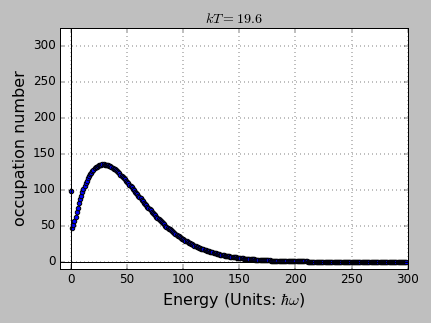

In [7]:
plt.figure()
plt.grid()
plt.xlabel('Energy (Units: $\hbar\omega$)')
plt.ylabel('occupation number')
plt.scatter(mlist,occnum)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.xlim(-10,300)
plt.ylim(-10,325)
plt.title('$kT = %s$'%kt);


### Calcluations for $kT = 19.4\hbar\omega$

In [8]:
hw = 1.       # Energy level spacing
kt = 19.4*hw  # Boltzmann constant times temperature
n = 10000     # Number of particles in trap
sumlim = 300  # Maximum value of quantum number m

#### Solve for normalization constant (it will be $>1$, but close to 1)

In [9]:
root = optimize.newton(f, 1.00001) 
root

1.003421744975167

#### Calculate and plot occupation numbers.

<IPython.core.display.Javascript object>


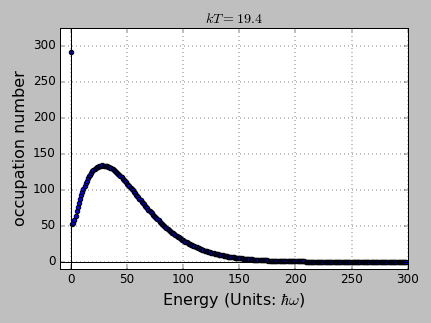

In [10]:
occnum = np.array([dist(root,m)*(m+2)*(m+1)/2 for m in range(sumlim)])
mlist = np.array([m for m in range(sumlim)])

plt.figure()
plt.grid()
plt.xlabel('Energy (Units: $\hbar\omega$)')
plt.ylabel('occupation number')
plt.scatter(mlist,occnum)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.xlim(-10,300)
plt.ylim(-10,325)
plt.title('$kT = %s$'%kt);

#### Version Information

`version_information` is from J.R. Johansson (jrjohansson at gmail.com) 
See <a http="http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-0-Scientific-Computing-with-Python.ipynb">Introduction to scientific computing with Python</a> for more information and instructions for package installation.

version_information has been installed system wide on Bucknell linux network

In [11]:
%load_ext version_information

In [12]:
%version_information numpy, scipy, matplotlib

Software versions
Python 3.7.7 64bit [GCC 7.3.0]
IPython 7.16.1
OS Linux 4.9.0 9 amd64 x86_64 with debian 9.13
numpy 1.18.5
scipy 1.5.0
matplotlib 3.2.2
Tue Dec 29 12:09:03 2020 EST